## Exercise 1: Numerical derivatives in one dimension

In [2]:
# import modules
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
%matplotlib inline

### (1) Express the Laplace operator $\Delta f = \frac{d^2 f(r)}{d r^2}$ numerically on an equidistant mesh.

Here, we use the approximation

\begin{equation}
    \Delta f  = \frac{d^2 f(r)}{d r^2}
    \approx \frac{f(x+\Delta x) - 2 f(x) + f(x-\Delta x)}{\Delta x^2}
\end{equation}

Note that in python, you can pass functions are arguments.  Of course, you can also create a function that takes the discretized f(x) as input.

In [2]:
def laplace_numeric(yvar, xvar):
    dx = xvar[1] - xvar[0]    # assumes regular grid
    return (np.roll(yvar, 1) 
            - 2.*yvar 
            + np.roll(yvar, -1)) / dx**2.

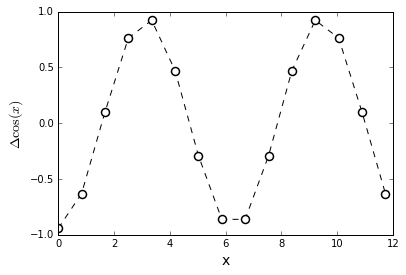

In [3]:
# define the xLength and nmesh
xLength = 4.*np.pi
nmesh = 15

# calculate dx
xvar, dx = np.linspace(0., xLength, nmesh, endpoint=False, retstep=True)
yvar = np.cos(xvar)

# calculate the numerical Laplacian
yvar_pp_approx = laplace_numeric(yvar, xvar)

# plot
plt.clf()
plt.plot(xvar, yvar_pp_approx, '--ok',
         markeredgewidth=1.5, markerfacecolor='w', ms=8, label='approx.')
plt.xlabel('x', fontsize=14)
plt.ylabel('$\Delta \cos(x)$', fontsize=14)

### (2) Define an analytical periodic test function.

First we need an analytical test function.  For this purpose, a sinusoidal function is convenient.  Here, we take the `np.cos` function.

\begin{equation}
    \Delta \cos(x) = -\cos(x)
\end{equation}

In [4]:
def laplacian_cos(xvar):
    """ Return the Laplacian of cos(x) """
    return -np.cos(xvar)

In [5]:
# calcate the exact value of the Laplacian
xvar_fine = np.linspace(0., xLength, 10001)
yvar_pp_exact = laplacian_cos(xvar_fine)

### (3) Compare the analytic and numerical result for the Laplace operator.

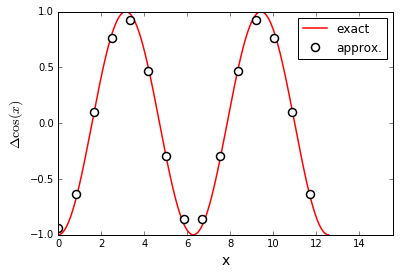

In [6]:
# plot the approximate and exact solution together.
plt.clf()
plt.plot(xvar_fine, yvar_pp_exact, '-r', 
         linewidth=1.5, label='exact')
plt.plot(xvar, yvar_pp_approx, 'ok',
         markeredgewidth=1.5, markerfacecolor='w', ms=8, label='approx.')
plt.legend(loc=1, numpoints=1)
plt.xlim([0., xLength+3.])
plt.xlabel('x', fontsize=14)
plt.ylabel('$\Delta \cos(x)$', fontsize=14)

### (4) Plot the mean deviation between the exact and numerical derivative as a function of dx (keep xLength fixed).

In [7]:
# create a function that calculates the root mean square 
# error between two arrays.
def calc_rmse(fxn_approx, fxn_exact):
    return np.mean(np.sum((fxn_approx - fxn_exact)**2.))**(1./2.)

In [8]:
# create an array of mesh grids to be explored
nmesh_array = np.round(np.logspace(1, 6, 101, base=10))

# initialize rmse array where we store the errors
rmse = np.zeros(nmesh_array.shape)

# loop over values of nmesh
for ii, nmesh in enumerate(nmesh_array):

    # calculate dx
    xvar, dx = np.linspace(0., xLength, nmesh, endpoint=False, retstep=True)
    yvar = np.cos(xvar)

    # calculate the numerical Laplacian
    yvar_pp_approx = laplace_numeric(yvar, xvar)

    # calculate exact
    yvar_pp_exact = laplacian_cos(xvar)
    rmse[ii] = calc_rmse(yvar_pp_approx, yvar_pp_exact)

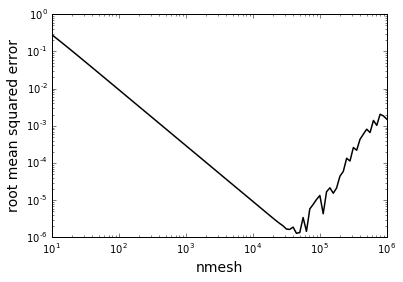

In [9]:
# plot results
plt.figure()
plt.clf()
plt.plot(nmesh_array, rmse, '-k', linewidth=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('nmesh', fontsize=14)
plt.ylabel('root mean squared error', fontsize=14)
# plt.axis('tight')

### (5) Discuss results.

## ADVANCED QUESTIONS/TASKS

### (6) Use a fourth-order approximation for the Laplacian.  How does it's computational efficiency compare to the second order approximation?  How does its convergence with `nmesh`?
**Hint** You can use `%%time` to measure the execution time of a cell (`%%timeit` for very fast code, this runs the cell many times, then takes the average).

Example:

    %%time
    [.. enter your code here..]
    
Output:

    CPU times: user XX.X ms, sys: X.XX ms, total: XX.X ms
    Wall time: XX.X ms

### (7) Instead of using `np.roll`, use the modulo operator (`%`) to do the function above.